In [1]:
%matplotlib inline

In [2]:
import keras
import numpy
import matplotlib.pyplot
import pandas

Using TensorFlow backend.


In [3]:
shape = (32, 32, 1)

x = keras.layers.Input(shape)

In [4]:
classes = 2

The classifier architecture is adapted from the LeNet-5 convolutional neural network by Yann LeCunn, et al.

In [5]:
options = {"activation": "relu", "kernel_size": (3, 3)}

y = keras.layers.Conv2D(32, **options)(x)
y = keras.layers.Conv2D(64, **options)(y)

y = keras.layers.MaxPooling2D()(y)

y = keras.layers.Dropout(0.5)(y)

y = keras.layers.Flatten()(y)

y = keras.layers.Dense(128, activation="relu")(y)

y = keras.layers.Dropout(0.5)(y)

y = keras.layers.Dense(classes)(y)

y = keras.layers.Activation("softmax")(y)

In [6]:
model = keras.models.Model(x, y)

In [7]:
loss = keras.losses.categorical_crossentropy

optimizer = keras.optimizers.Adam(0.0001)

model.compile(
    loss=loss, 
    metrics=[
        "accuracy"
    ],
    optimizer=optimizer
)

In [8]:
training_x, training_y = numpy.load("data/training_x.npy"), numpy.load("data/training_y.npy")

training_y = keras.utils.np_utils.to_categorical(training_y)

In [9]:
csv_logger = keras.callbacks.CSVLogger("training.csv")

early_stopping = keras.callbacks.EarlyStopping(patience=32)

model_checkpoint = keras.callbacks.ModelCheckpoint("checkpoint.hdf5")

reduce_learning_rate_on_plateau = keras.callbacks.ReduceLROnPlateau()

In [10]:
model.fit(
    batch_size=4096,
    callbacks=[
        csv_logger,
        early_stopping,
        model_checkpoint,
        reduce_learning_rate_on_plateau
    ],
    epochs=256,
    validation_split=0.25,
    x=training_x,
    y=training_y
)

Train on 16015 samples, validate on 5339 samples
Epoch 1/256
16015/16015 [==============================] - 4s - loss: 6.1049 - acc: 0.5483 - val_loss: 7.2751 - val_acc: 0.4947
Epoch 2/256
16015/16015 [==============================] - 0s - loss: 5.4031 - acc: 0.5650 - val_loss: 3.8626 - val_acc: 0.6361
Epoch 3/256
16015/16015 [==============================] - 0s - loss: 4.7295 - acc: 0.6049 - val_loss: 2.6761 - val_acc: 0.6855

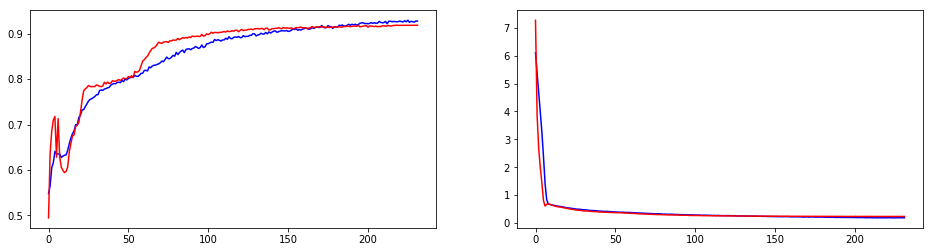

In [11]:
observations = pandas.read_csv("training.csv")

_, (a, b) = matplotlib.pyplot.subplots(nrows=1, ncols=2, figsize=(16, 4))

a.plot(observations["acc"], "b")
a.plot(observations["val_acc"], "r")

b.plot(observations["loss"], "b")
b.plot(observations["val_loss"], "r")

In [12]:
model.load_weights("./checkpoint.hdf5")

In [13]:
test_x, test_y = numpy.load("data/test_x.npy"), numpy.load("data/test_y.npy")

test_y = keras.utils.np_utils.to_categorical(test_y)

In [14]:
model.evaluate(test_x, test_y)

2336/2374 [============================>.] - ETA: 0s

[0.247156853322332, 0.90227464195450713]